# Python notebook giving an example of text analysis.

A few basic examples of text analysis are shown. Topics covered are keyword extraction, vector representation of text samples, n-grams, tf-tfidf matrices, and clustering of text by either K-means or LDA.

But before all that, I'll need some text data to work with. Often this will be case notes, OCR'd text, emails, etc. But for this example notebook I'll generate some fake text.

First I take the first 3000 characters from A Christmas Carol, The Arabian Nights: the Tale of the Bull and the Ass, The Raven, and Secret Garden.

In [1]:
ACC='Marley was dead: to begin with. There is no doubt whatever about that. The register of his burial was signed by the clergyman, the clerk, the undertaker, and the chief mourner. Scrooge signed it: and Scrooge’s name was good upon ’Change, for anything he chose to put his hand to. Old Marley was as dead as a door-nail. \n\nMind! I don’t mean to say that I know, of my own knowledge, what there is particularly dead about a door-nail. I might have been inclined, myself, to regard a coffin-nail as the deadest piece of ironmongery in the trade. But the wisdom of our ancestors is in the simile; and my unhallowed hands shall not disturb it, or the Country’s done for. You will therefore permit me to repeat, emphatically, that Marley was as dead as a door-nail. \n\nScrooge knew he was dead? Of course he did. How could it be otherwise? Scrooge and he were partners for I don’t know how many years. Scrooge was his sole executor, his sole administrator, his sole assign, his sole residuary legatee, his sole friend, and sole mourner. And even Scrooge was not so dreadfully cut up by the sad event, but that he was an excellent man of business on the very day of the funeral, and solemnised it with an undoubted bargain. \n\nThe mention of Marley’s funeral brings me back to the point I started from. There is no doubt that Marley was dead. This must be distinctly understood, or nothing wonderful can come of the story I am going to relate. If we were not perfectly convinced that Hamlet’s Father died before the play began, there would be nothing more remarkable in his taking a stroll at night, in an easterly wind, upon his own ramparts, than there would be in any other middle-aged gentleman rashly turning out after dark in a breezy spot—say Saint Paul’s Churchyard for instance—literally to astonish his son’s weak mind. \n\nScrooge never painted out Old Marley’s name. There it stood, years afterwards, above the warehouse door: Scrooge and Marley. The firm was known as Scrooge and Marley. Sometimes people new to the business called Scrooge Scrooge, and sometimes Marley, but he answered to both names. It was all the same to him. \n\nOh! But he was a tight-fisted hand at the grindstone, Scrooge! a squeezing, wrenching, grasping, scraping, clutching, covetous, old sinner! Hard and sharp as flint, from which no steel had ever struck out generous fire; secret, and self-contained, and solitary as an oyster. The cold within him froze his old features, nipped his pointed nose, shrivelled his cheek, stiffened his gait; made his eyes red, his thin lips blue; and spoke out shrewdly in his grating voice. A frosty rime was on his head, and on his eyebrows, and his wiry chin. He carried his own low temperature always about with him; he iced his office in the dog-days; and didn’t thaw it one degree at Christmas. \n\nExternal heat and cold had little influence on Scrooge. No warmth could warm, no wintry weather chill him. No wind that blew was bitterer than he, no falling snow was more intent upon it'
ANBA='KNOW, O my daughter, that there was once a merchant who owned much money and many men, and who was rich in cattle and camels. He had also a wife and family, and he dwelt in the country, being experienced in husbandry and devoted to agriculture. Now Allah Most High had endowed him with understanding the tongues of beasts and birds of every kind, but under pain of death if he divulged the gift to any. So he kept it secret for very fear. He had in his cow house a bull and an ass, each tethered in his own stall, one hard by the other. As the merchant was sitting near-hand one day with his servans and his children were playing about him, he heard and bull say to the ass:\n "Hail and health to thee O Father of Waking! for that thou enjoyest rest and good ministering. All under thee is clean-swept and fresh-sprinkled. Men wait upon thee and feed thee, and thy provaunt is sifted barley and thy drink pure spring water, while I (unhappy creature!) am led forth in the middle of the night, when they set on my neck the plow and a something called yoke, and I tire at cleaving the earth from dawn of day till set of sun. I am forced to do more than I can and to bear all manner of ill-treatment from night to night. After which they take me back with my sides torn, my neck flayed, my legs aching, and mine eyelids sored with tears. Then they shut me up in the byre and throw me beans and crushed straw mixed with dirt and chaff, and I lie in dung and filth and foul stinks through the livelong night. But thou art ever in a place swept and sprinkled and cleansed, and thou art always lying at ease, save when it happens (and seldom enough!) that the master hath some business, when he mounts thee and rides thee to town and returns with thee forthright. So it happens that I am toiling and distrest while thou takest thine ease and thy rest. Thou sleepest while I am sleepless, I hunger still while thou eatest thy fill, and I win contempt while thou winnest goodwill."\n When the bull ceased speaking, the ass turned toward him and said: "O Broad-o\'-Brow, O thou lost one! He lied not who dubbed thee bullhead, for thou, O father of a bull, hast neither forethought nor contrivance. Thou art the simplest of simpletons, and thou knowest naught of good advisers. Hast thou not heard the saying of the wise? \n\n\n"For others these hardships and labors I bear,\n And theirs is the pleasure and mine is the care,\n As the bleacher who blacketh his brow in the sun\n To whiten the raiment which other men wear. \n\nBut thou, O fool, art full of zeal, and thou toilest and moilest before the master, and thou tearest and wearest and slayest thyself for the comfort of another. Hast thou never heard the saw that saith \'None to guide and from the way go wide\'? Thou wendest forth at the call to dawn prayer and thou returnest not till sundown, and through the livelong day thou endurest all manner hardships: to wit, beating and belaboring and bad language.\n "Now hearken to me, Sir Bull! When they tie thee to t'
TR='Once upon a midnight dreary, while I pondered, weak and weary,\n\n\nOver many a quaint and curious volume of forgotten lore—\n\n\n    While I nodded, nearly napping, suddenly there came a tapping,\n\n\nAs of some one gently rapping, rapping at my chamber door.\n\n\n“’Tis some visitor,” I muttered, “tapping at my chamber door—\n\n\n            Only this and nothing more.”\n\n\n\n\n\n    Ah, distinctly I remember it was in the bleak December;\n\n\nAnd each separate dying ember wrought its ghost upon the floor.\n\n\n    Eagerly I wished the morrow;—vainly I had sought to borrow\n\n\n    From my books surcease of sorrow—sorrow for the lost Lenore—\n\n\nFor the rare and radiant maiden whom the angels name Lenore—\n\n\n            Nameless here for evermore.\n\n\n\n\n\n    And the silken, sad, uncertain rustling of each purple curtain\n\n\nThrilled me—filled me with fantastic terrors never felt before;\n\n\n    So that now, to still the beating of my heart, I stood repeating\n\n\n    “’Tis some visitor entreating entrance at my chamber door—\n\n\nSome late visitor entreating entrance at my chamber door;—\n\n\n            This it is and nothing more.”\n\n\n\n\n\n    Presently my soul grew stronger; hesitating then no longer,\n\n\n“Sir,” said I, “or Madam, truly your forgiveness I implore;\n\n\n    But the fact is I was napping, and so gently you came rapping,\n\n\n    And so faintly you came tapping, tapping at my chamber door,\n\n\nThat I scarce was sure I heard you”—here I opened wide the door;—\n\n\n            Darkness there and nothing more.\n\n\n\n\n\n    Deep into that darkness peering, long I stood there wondering, fearing,\n\n\nDoubting, dreaming dreams no mortal ever dared to dream before;\n\n\n    But the silence was unbroken, and the stillness gave no token,\n\n\n    And the only word there spoken was the whispered word, “Lenore?”\n\n\nThis I whispered, and an echo murmured back the word, “Lenore!”—\n\n\n            Merely this and nothing more.\n\n\n\n\n\n    Back into the chamber turning, all my soul within me burning,\n\n\nSoon again I heard a tapping somewhat louder than before.\n\n\n    “Surely,” said I, “surely that is something at my window lattice;\n\n\n      Let me see, then, what thereat is, and this mystery explore—\n\n\nLet my heart be still a moment and this mystery explore;—\n\n\n            ’Tis the wind and nothing more!”\n\n\n\n\n\n    Open here I flung the shutter, when, with many a flirt and flutter,\n\n\nIn there stepped a stately Raven of the saintly days of yore;\n\n\n    Not the least obeisance made he; not a minute stopped or stayed he;\n\n\n    But, with mien of lord or lady, perched above my chamber door—\n\n\nPerched upon a bust of Pallas just above my chamber door—\n\n\n            Perched, and sat, and nothing more.\n\n\n\n\n\nThen this ebony bird beguiling my sad fancy into smiling,\n\n\nBy the grave and stern decorum of the countenance it wore,\n\n\n“Though thy crest be shorn and shaven, thou,” I said, “art sure no craven,\n\n\nGhastly grim and ancient Raven wandering from the Nightly shore—\n\n\nTell me what thy lordly name is on the Night’s Plutonian shore!”\n\n\n    '
SG='When Mary Lennox was sent to Misselthwaite Manor to live with her uncle everybody said she was the most disagreeable-looking child ever seen. It was true, too. She had a little thin face and a little thin body, thin light hair and a sour expression. Her hair was yellow, and her face was yellow because she had been born in India and had always been ill in one way or another. Her father had held a position under the English Government and had always been busy and ill himself, and her mother had been a great beauty who cared only to go to parties and amuse herself with gay people. She had not wanted a little girl at all, and when Mary was born she handed her over to the care of an Ayah, who was made to understand that if she wished to please the Mem Sahib she must keep the child out of sight as much as possible. So when she was a sickly, fretful, ugly little baby she was kept out of the way, and when she became a sickly, fretful, toddling thing she was kept out of the way also. She never remembered seeing familiarly anything but the dark faces of her Ayah and the other native servants, and as they always obeyed her and gave her her own way in everything, because the Mem Sahib would be angry if she was disturbed by her crying, by the time she was six years old she was as tyrannical and selfish a little pig as ever lived. The young English governess who came to teach her to read and write disliked her so much that she gave up her place in three months, and when other governesses came to try to fill it they always went away in a shorter time than the first one. So if Mary had not chosen to really want to know how to read books she would never have learned her letters at all. \n\nOne frightfully hot morning, when she was about nine years old, she awakened feeling very cross, and she became crosser still when she saw that the servant who stood by her bedside was not her Ayah. \n\n"Why did you come?" she said to the strange woman. "I will not let you stay. Send my Ayah to me." \n\nThe woman looked frightened, but she only stammered that the Ayah could not come and when Mary threw herself into a passion and beat and kicked her, she looked only more frightened and repeated that it was not possible for the Ayah to come to Missie Sahib. \n\nThere was something mysterious in the air that morning. Nothing was done in its regular order and several of the native servants seemed missing, while those whom Mary saw slunk or hurried about with ashy and scared faces. But no one would tell her anything and her Ayah did not come. She was actually left alone as the morning went on, and at last she wandered out into the garden and began to play by herself under a tree near the veranda. She pretended that she was making a flower-bed, and she stuck big scarlet hibiscus blossoms into little heaps of earth, all the time growing more and more angry and muttering to herself the things she would say and the names she would call Saidie when she returned. \n\n"Pig! Pig! Daughter of Pigs!" s'

Next, I'll generate a bunch of text examples from these options:

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df=pd.DataFrame();
df['Topic']=''
df['text']=''
df

,Topic,text


Generating fake text samples from the various topics by pulling random segments of between 300 and 500 characters in length from the topic:

In [4]:
Topics=[ACC,ANBA,TR,SG]
Topic_titles=['Christmas_Carol','Arabian_Nights','The_Raven','Secret_garden']
text_samples=200;
c=0;
t=0;
for topic in Topics:
    for x in range(0,text_samples):
        a=np.random.randint(0,2500)
        b=np.random.randint(300,500)
        df.loc[c,'Topic']=Topic_titles[t]
        df.loc[c,'text']=topic[a:a+b]
        c=c+1
    t=t+1
df.sample(4)

,Topic,text
767,Secret_garden,s. But no one would tell her anything and her ...
425,The_Raven,"p into that darkness peering, long I stood the..."
399,Arabian_Nights,being experienced in husbandry and devoted to ...
172,Christmas_Carol,ey. Sometimes people new to the business calle...


Quick check that things are going according to plan.

First, correct number of text samples from each topic were taken:

In [5]:
df['Topic'].value_counts()

Secret_garden      200
Arabian_Nights     200
The_Raven          200
Christmas_Carol    200
Name: Topic, dtype: int64

Second, that the text samples are between 300 and 500 characters in length:

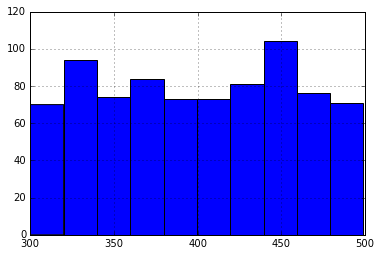

In [6]:
df['text'].str.len().hist()

In [7]:
df.sample(10)

,Topic,text
567,The_Raven,its ghost upon the floor.\n\n\n Eagerly I ...
542,The_Raven,he floor.\n\n\n Eagerly I wished the morrow...
440,The_Raven,"minute stopped or stayed he;\n\n\n But, wi..."
420,The_Raven,"ger,\n\n\n“Sir,” said I, “or Madam, truly your..."
686,Secret_garden,"expression. Her hair was yellow, and her face ..."
19,Christmas_Carol,sed it with an undoubted bargain. \n\nThe ment...
630,Secret_garden,"was not her Ayah. \n\n""Why did you come?"" she ..."
141,Christmas_Carol,ley. Sometimes people new to the business call...
512,The_Raven,nothing more!”\n\n\n\n\n\n Open here I flu...
355,Arabian_Nights,"toward him and said: ""O Broad-o'-Brow, O thou ..."


## Cleaning the data

Next, a bit of cleaning might be in order to make the text analysis easier. I'll put the text in lower case, replace carriage returns with spaces, and remove extra whitespace. I'll save this in a new column so as to not delete my original data.

Breaking down the next line:

1. .str tells Pandas this will be a string function.
2. .lower() replaces all upper case with lower case
3. .str again for another string function
4. .replace('A','B') replaces all instances of A with B
5. .apply(lambda x: ....) applies a function to the values (x) in the column.
6. re.sub(' +',' ', x) replaces multiple spaces with a single space in x, where x has been described prev. in lambda

In [8]:
df['text_cleaned']=df['text'].str.lower().str.replace("\n",' ').apply(lambda x: re.sub(' +',' ',x))

In [9]:
df.sample(4)

,Topic,text,text_cleaned
71,Christmas_Carol,nstance—literally to astonish his son’s weak m...,nstance—literally to astonish his son’s weak m...
452,The_Raven,y explore—\n\n\nLet my heart be still a moment...,y explore— let my heart be still a moment and ...
758,Secret_garden,never remembered seeing familiarly anything b...,never remembered seeing familiarly anything b...
148,Christmas_Carol,ronmongery in the trade. But the wisdom of our...,ronmongery in the trade. but the wisdom of our...


Note that this slightly changes the text lengths of the samples, do to whitespace being removed:

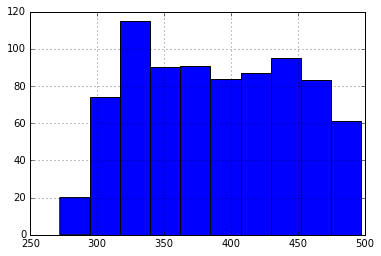

In [10]:
df['text_cleaned'].str.len().hist()

So far All that's been done is the generation of fake data and a bit of text cleaning. Next up, keyword searches:

## Keywords

In [11]:
df.loc[df['text_cleaned'].str.contains('the'),'Topic'].value_counts()

Secret_garden      200
Arabian_Nights     200
The_Raven          200
Christmas_Carol    199
Name: Topic, dtype: int64

In [12]:
df.loc[df['text_cleaned'].str.contains('scrooge'),'Topic'].value_counts()

Christmas_Carol    132
Name: Topic, dtype: int64

In [13]:
df.loc[df['text_cleaned'].str.contains('perched'),'Topic'].value_counts()

The_Raven    34
Name: Topic, dtype: int64

Pandas aside: if you want to see more than the first few character of a string in the dataframe, use values:

In [14]:
df.loc[df['text_cleaned'].str.contains('perched'),'text_cleaned'][:2].values

array([ ' the saintly days of yore; not the least obeisance made he; not a minute stopped or stayed he; but, with mien of lord or lady, perched above my chamber door— perched upon a bust of pallas just above my chamber door— perched, and sat, and nothing more. then this ebony bird beguiling my sad fancy into smiling, by the grave and stern de',
       ' with many a flirt and flutter, in there stepped a stately raven of the saintly days of yore; not the least obeisance made he; not a minute stopped or stayed he; but, with mien of lord or lady, perched above my chamber door— perched upon a bust of pallas just above my chamber door— perched, and sat, and nothing more. then this ebony bird beguiling my sad fancy into smil'], dtype=object)

# Stemming text

Often we want to count words with different suffixes the same (e.g. tap, tapped, tapping). We can use a stemmer to take words to their base components. 

In [15]:
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer("english")
def stem(tokens):
    token_list=tokens.split(' ');
    stem=[stemmer.stem(word) for word in token_list];
    return " ".join(stem)

In [16]:
df['text_stemmed']=df['text_cleaned'].apply(stem)

In [17]:
df.sample(4)

,Topic,text,text_cleaned,text_stemmed
418,The_Raven,plore—\n\n\nLet my heart be still a moment and...,plore— let my heart be still a moment and this...,plore— let my heart be still a moment and this...
588,The_Raven,ng at my chamber door.\n\n\n“’Tis some visitor...,"ng at my chamber door. “’tis some visitor,” i ...","ng at my chamber door. “'tis some visitor,” i ..."
37,Christmas_Carol,n’s weak mind. \n\nScrooge never painted out O...,n’s weak mind. scrooge never painted out old m...,n weak mind. scroog never paint out old marley...
558,The_Raven,"the fact is I was napping, and so gently you ...","the fact is i was napping, and so gently you ...","the fact is i was napping, and so gentl you c..."


# tfidf matrix

To creat a vector representation of the text, a matrix of token counts is often a good place to start. Each row in the matrix corresponds to a particular text sample. Each column is associated with a particular token (word or phrase).

Simple example with 2 sentences:

S1: "see spot run"

S2: "run spot run"

count matrix: columns: [['see', 'spot', 'run']

matrix:[[1,1,1],[0,1,2]]

We can choose to use only single word tokens or phrases (e.g. 'spot run' shows up in both S1 and S2). We generalize this to describing the tokens as n-grams, where n signals the number of words in the n-gram. (e.g. 'see' is a 1-gram/unigram, 'spot run' is a 2-gram/bigram, etc.)

We can also limit which n-grams in the text are treated as tokens. Some words are so common they carry little meaning ('a', 'the', etc.). We can remove these stop_words from consideration. Some words only appear 1 or 2 text samples, which are also not very useful. Same for words that appear in every, or almost every, text sample. We can set lower and upper bounds on the fraction of text samples that have the n-gram we will include in the count matrix. We can limit ourselves to only certain n-grams: just single words, only phrases of 2-4 words, etc. Finally, we can set a hard cutoff for the number of tokens to include in the matrix (tokens ordered by freq in the collection of text).

Finally, we can normalize this matrix of counts so that all values are between 0 and 1. 

To do all but the last step, CountVectorizer will do the trick.

To normalize, call TfidfTransformer on the CountVectorizer. Or just us TfidfVectorizer, which combines these 2 steps:

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [19]:
col='text_cleaned'
tfidf_vectorizer = TfidfVectorizer(max_df=.95, max_features=150,
                    analyzer='word', min_df=.05, use_idf=True, ngram_range=(1,7),stop_words='english');
tfidf_matrix = tfidf_vectorizer.fit_transform(df.loc[:,col].values);
terms=tfidf_vectorizer.get_feature_names();
print(np.shape(tfidf_matrix)) #gives shape of matrix. rows==number of text samples. columns==length of vector rep.

(800, 150)


In [20]:
terms

['art',
 'ass',
 'ayah',
 'ayah did',
 'ayah did come',
 'bear',
 'beating',
 'began',
 'books',
 'born',
 'brow',
 'bull',
 'business',
 'business called',
 'business called scrooge',
 'called',
 'came',
 'care',
 'chamber',
 'chamber door',
 'child',
 'come',
 'country',
 'curtain',
 'curtain thrilled',
 'curtain thrilled filled',
 'dark',
 'day',
 'days',
 'dead',
 'dead door',
 'dead door nail',
 'did',
 'did come',
 'distinctly',
 'don',
 'door',
 'door nail',
 'ease',
 'english',
 'entrance',
 'entrance chamber',
 'entrance chamber door',
 'entreating',
 'entreating entrance',
 'entreating entrance chamber',
 'entreating entrance chamber door',
 'faces',
 'father',
 'felt',
 'filled',
 'filled fantastic',
 'forth',
 'fretful',
 'gave',
 'good',
 'hand',
 'happens',
 'hard',
 'hast',
 'hast thou',
 'hast thou heard',
 'heard',
 'heart',
 'ill',
 'kept',
 'kept way',
 'know',
 'lenore',
 'let',
 'little',
 'lost',
 'marley',
 'marley dead',
 'marley dead door',
 'marley dead door n

The next step is to transform the text in thd dataframe (df) to a vector representation by tranforming it via the tfidf_vectorizer:

In [21]:
tfidf = tfidf_vectorizer.fit_transform(df.loc[:,col].values)

This is saved as a sparse matrix:

In [22]:
tfidf

<800x150 sparse matrix of type '<class 'numpy.float64'>'
	with 10185 stored elements in Compressed Sparse Row format>

If we want, we can convert it to a dense matrix to better see what's happening:

In [23]:
TFIDF=tfidf.todense()

Let me take a look at a random row from the array. I'll first look at the vector only. Then, I'll use the terms defined above to print out all the n-grams elements with values over 0 and compare to the text from the dataframe:

In [24]:
x=np.random.randint(0,len(df))
print(x)
txt=df.loc[x,'text_cleaned']
print(txt)
print(" ")
print(TFIDF[x])

373
e had also a wife and family, and he dwelt in the country, being experienced in husbandry and devoted to agriculture. now allah most high had endowed him with understanding the tongues of beasts and birds of every kind, but under pain of death if he divulged the gift to any. so he kept it secret for very fear. he had in his cow house a bull and an ass, each tethered in his own stall, one hard by the other. as the merchant was sitting near-hand one day 
 
[[ 0.          0.31907815  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.30979754  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.35048137  0.          0.          0.          0.
   0.30653581  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   

Focusing on only the non zero elements. They are assoicated with the ngrams:

In [25]:
ngrams=pd.Series(terms)[np.where(np.array([TFIDF[x]>0]))[2]].values
ngrams

array(['ass', 'bull', 'country', 'day', 'hand', 'hard', 'kept', 'near',
       'secret'], dtype=object)

And just for fun, reprinting the text sample with words associated wiht elements of the vector representation in CAPS. 

In [26]:
txt_split=txt.split(' ');
txt2=''
for x in range(0,len(txt_split)):
    if txt_split[x] in ngrams:
        txt2=" ".join([txt2,txt_split[x].upper()])
    else:
        txt2=" ".join([txt2,txt_split[x]])
txt2

' e had also a wife and family, and he dwelt in the country, being experienced in husbandry and devoted to agriculture. now allah most high had endowed him with understanding the tongues of beasts and birds of every kind, but under pain of death if he divulged the gift to any. so he KEPT it SECRET for very fear. he had in his cow house a BULL and an ass, each tethered in his own stall, one HARD by the other. as the merchant was sitting near-hand one DAY '

# Reducing the dimension with LSA

The tfidf matrix has dimensions currently associated with particular n-grams from the text samples. This makes it easier to read, but also makes it hard to visualize. We can often reduce the dimension of the matrix and make it easier to plot by SVD. Often, principle component analysis (PCA) is the method of choice for this. With text, LSA is often used, but near enough it amounts to the same thing.

## Aside: Choosing reduction in dimension

The amount we can reduce the dimensions is limited by the varience of the data. For example, we could have 3D data that falls on a straight line:

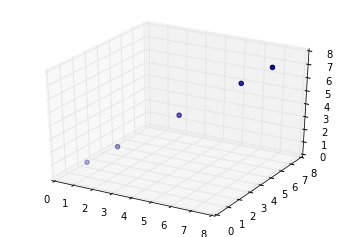

In [27]:
from mpl_toolkits.mplot3d import Axes3D
data=[[1,1,1],[2,2,2],[4,4,4],[6,6,6],[7,7,7]]
X,Y,Z=np.transpose(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z)

That data could be equally represented in 1 dimension. To quantify that, we can do singular value decomposition and track how much each optimized dimension contributes to accurately representing the variance in the data (normalized to 1):

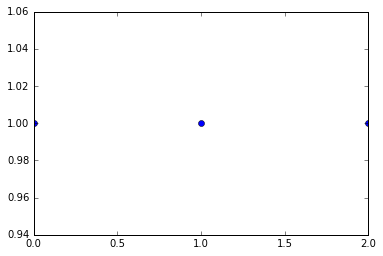

In [28]:
u,s,vh=np.linalg.svd(data)
s/s.sum()
totals=[];
total=0
for elm in s/s.sum():
    total=total+elm
    totals.append(total)
plt.plot(totals,'bo')

Sure enough, only a single dimension is needed to perfectly represent this data.

I'll go ahead and reduce the dimension of the data to 2. Yes, 1 is all that's really needed, but it's easy to plot 2 dimensions:

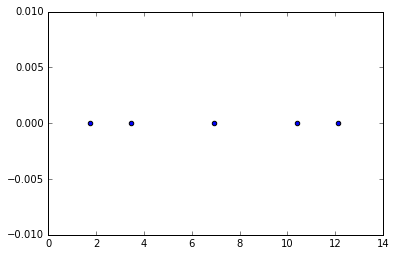

In [29]:
from sklearn import decomposition
svd = decomposition.TruncatedSVD(n_components=2, n_iter=70)
data_new=svd.fit_transform(data)
X,Y=np.transpose(data_new)
plt.scatter(X,Y)

### trying the same thing with data that doesn't lend as readily to dim. reduction:

Now let's see about reducing the dimension of some random 3D data:

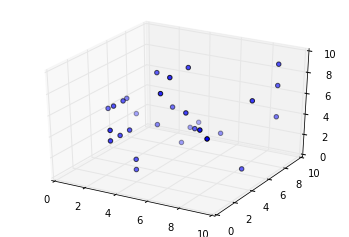

In [30]:
data=np.random.randint(1,10,size=(30,3));
X,Y,Z=np.transpose(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z)

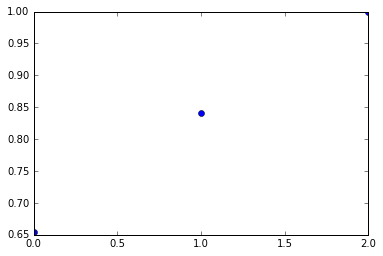

In [31]:
u,s,vh=np.linalg.svd(data)
s/s.sum()
totals=[];
total=0
for elm in s/s.sum():
    total=total+elm
    totals.append(total)
plt.plot(totals,'bo')

With this data, if we reduce it from 3 dimensions to 2, we will retain only a portion of the variance in the data (probably 80-85% if your data looks like mine).

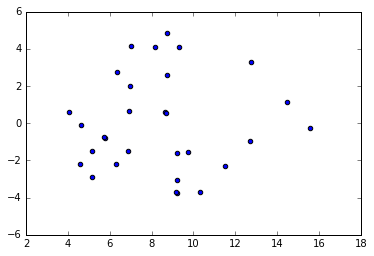

In [32]:
from sklearn import decomposition
svd = decomposition.TruncatedSVD(n_components=2, n_iter=7)
data_new=svd.fit_transform(data)
X,Y=np.transpose(data_new)
plt.scatter(X,Y)

# End aside

# SVD to determine how many dimensions to keep from tfidf

In [33]:
u,s,vh=np.linalg.svd(tfidf.todense());

Plotting the amount of variance retained by keeping up to the ith dimension:

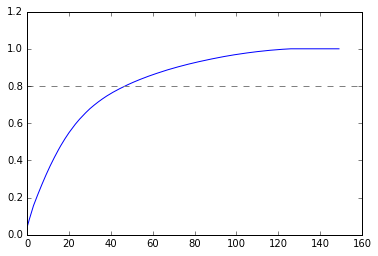

In [34]:
totals=[];
total=0
for elm in s/s.sum():
    total=total+elm
    totals.append(total)
plt.plot(totals)
plt.axhline(y=.8,linestyle='--',color='gray')

In [35]:
variance=pd.Series(totals)
keep=.8;
dim_top=variance[variance>keep].index[0]
print('To keep %s percent of original variance, I need to retain the top %s dimensions'%(keep*100,dim_top))

To keep 80.0 percent of original variance, I need to retain the top 47 dimensions


In [36]:
from sklearn import decomposition
lsa=decomposition.TruncatedSVD(n_components=dim_top, algorithm='randomized', n_iter=5);
DenseMatrix=lsa.fit_transform(tfidf);

In [37]:
import matplotlib.cm as cm

In [38]:
def plot_topics(dim1, dim2):
    colors=iter(cm.rainbow(np.linspace(0, 1, 4)))
    for x in range(0,4):
        a=text_samples*x;
        b=text_samples*(x+1)
        c=next(colors)
        plt.scatter(DenseMatrix[a:b,dim1],DenseMatrix[a:b,dim2],color=c)
    #plt.show()

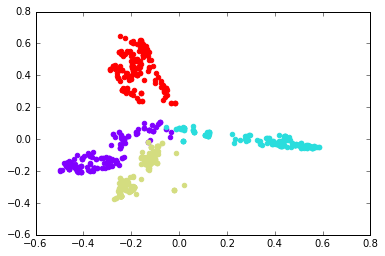

In [39]:
plot_topics(1,3)

In [40]:
from scipy import cluster; #k-means clustering algorithm.

## K-means clustering

Fast, unsupervised learning method for clustering data into categories. Positive is that it's fast. Negative is that you must choose number of clusters to group dat into.

cluster.vq.kmeans2 takes the data, number of clusters (or coordinates of starting centroids), and number of iterations and returns the the final coordinates of the centroids and which cluster the data is assigned to. I'll use .kmeans2 below.

I'd highly recommend playing with the parameters here after running through it once. K-means can easily get trapped in local minima, so you will probably have occasional bad groupings. When using K-means on real data, we minimize this issue by having some performance metric/error measure (cluster.vq.kmeans has one built in) we can use to grade the groupings. We then run K-means many times and take the one with the best grade.

Other ideas: try changing the number of clusters. Drop the iterations to a low number so the algorithm doesn't have a chance to reach a minimum. Go back to the principle component analysis above and change the number of kept dimensions(or in the txt world, LSA) to 2. Then try 10.

In [41]:
num_clusters=4;
KM=cluster.vq.kmeans2(DenseMatrix, num_clusters,iter=10000);

In [42]:
def plot_kmeans(dim1, dim2):
    colors=iter(cm.rainbow(np.linspace(0, 1, num_clusters)))
    for x in range(0,num_clusters):
        a=text_samples*x;
        b=text_samples*(x+1)
        c=next(colors)
        plt.scatter(DenseMatrix[KM[1]==x,dim1],DenseMatrix[KM[1]==x,dim2],color=c)
    plt.scatter(KM[0][:,dim1], KM[0][:,dim2],color='black',s=40,marker='s',label='centroids');
    #plt.show()

K-means is an unsupervised learning algorithm. It doesn't use the topic label for the data. But we have that, since we made the fake data ourselves. So, we can plot the predicted topics from k-means alongside the known topics from our dataframe:

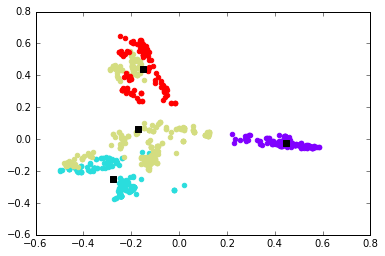

In [43]:
plot_kmeans(1,3)

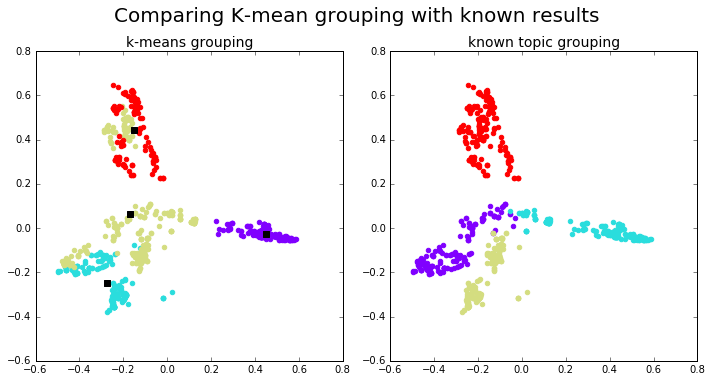

In [44]:
dim1=1;
dim2=3;
F=plt.figure(1,figsize=(10,5))
plt.subplot(121)
plot_kmeans(dim1,dim2)
plt.title('k-means grouping',fontsize=14)
# plt.xlabel('Dimension %s'%(dim1))
# plt.ylabel('Dimension %s'%(dim2))
plt.subplot(122)
plot_topics(dim1,dim2)
plt.title('known topic grouping',fontsize=14)
# plt.xlabel('Dimension %s'%(dim1))
# plt.ylabel('Dimension %s'%(dim2))
F.suptitle('Comparing K-mean grouping with known results', fontsize=20, y=1.05)
F.tight_layout()

Group numbers are based on the random initialization of the K-means algorithm, so the group colors in the comparision plots above will probably not match between the k-means and the known topics. However, the the fact that the K-means algorithm is doing a good job grouping should still be seen.

We can quantify how good the K-means algorithm is doing by building a confusion matrix for a given topic:

In [45]:
Topic_titles

['Christmas_Carol', 'Arabian_Nights', 'The_Raven', 'Secret_garden']

In [46]:
x=3 #index of the topic_title for confusion matrix
a=text_samples*x #setting start/stop locations of actual topic locations in KM
b=text_samples*(x+1)
KM_group=pd.Series(KM[1][a:b]).value_counts().index[0]
print("""Most of topic %s (%s) are contained in k-means group %s.
Associating that topic with that k-means group and producing confusion matrix\n"""%(x, Topic_titles[x],KM_group))
df_CM=pd.DataFrame(index=['Acutal topic (%s)'%(KM_group),'Actual others'],
                   columns=['Predicted topic (%s)'%(KM_group), 'Predicted others'])
df_CM.iloc[0,0]=np.sum(KM[1][a:b]==KM_group)
df_CM.iloc[0,1]=np.sum(KM[1][a:b]!=KM_group)
df_CM.iloc[1,0]=np.sum(np.concatenate((KM[1][:a],KM[1][b:]))==KM_group)
df_CM.iloc[1,1]=np.sum(np.concatenate((KM[1][:a],KM[1][b:]))!=KM_group)
print(df_CM)
print('\nwith percents of:\ntrue positive at %s,\nfalse positve at %s,\nfalse negative at %s,\nand true negative at %s'%(
            np.round(df_CM.iloc[0,0]/text_samples*100,2),np.round(df_CM.iloc[0,1]/text_samples*100,2),
       np.round(df_CM.iloc[1,0]/(len(df)-text_samples)*100,2),np.round(df_CM.iloc[1,1]/(len(df)-text_samples)*100,2)))

Most of topic 3 (Secret_garden) are contained in k-means group 3.
Associating that topic with that k-means group and producing confusion matrix

                 Predicted topic (3) Predicted others
Acutal topic (3)                 125               75
Actual others                      0              600

with percents of:
true positive at 62.5,
false positve at 37.5,
false negative at 0.0,
and true negative at 100.0


In [47]:
error=0;
s=int(len(df)/num_clusters)
for y in range(0,num_clusters):
    error=error+np.abs(pd.Series(KM[1][s*y:s*(y+1)]).value_counts().values[0]-s)
print("Total number of missed true positives:",error)

Total number of missed true positives: 290


## Multiple K-means to find best locations for centroids

The python module scipy has 2 built in kmeans algorithms, and they do slightly different things.

cluster.vq.kmeans runs the k-means algorithm to completion. It takes the data in the form of an array and the number of clusters to group into.

It outputs the final coordinates of the centroids and an error measure.

It also has an optional iter input, but <b>it is not the same iter as in vq.kmeans2</b>. This iter is the number of times to repeat running the full K-means algorithm. Then the module will return the centroids with the best error measure score. This is much slower than vq.kmeans2, but it helps avoid local minima.

I often use the trick of running vq.kmeans to get the best centroid locations, then passing those to vq.kmeans2 to get the group labels for the data:

In [48]:
KM_opt=cluster.vq.kmeans(DenseMatrix, num_clusters,iter=1000); #finding the best locations for the centroids

Passing the final centroid locations from KM_opt as the starting centroid locations in KM:

In [49]:
KM=cluster.vq.kmeans2(DenseMatrix, KM_opt[0],iter=1); #telling vq.kmeans2 to use the final l

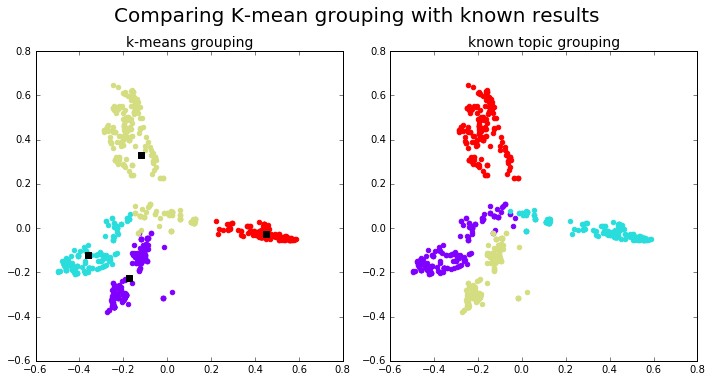

In [50]:
dim1=1;
dim2=3;
F=plt.figure(1,figsize=(10,5))
plt.subplot(121)
plot_kmeans(dim1,dim2)
plt.title('k-means grouping',fontsize=14)
# plt.xlabel('Dimension %s'%(dim1))
# plt.ylabel('Dimension %s'%(dim2))
plt.subplot(122)
plot_topics(dim1,dim2)
plt.title('known topic grouping',fontsize=14)
# plt.xlabel('Dimension %s'%(dim1))
# plt.ylabel('Dimension %s'%(dim2))
F.suptitle('Comparing K-mean grouping with known results', fontsize=20, y=1.05)
F.tight_layout()

In [51]:
error=0;
s=int(len(df)/num_clusters)
for y in range(0,num_clusters):
    error=error+np.abs(pd.Series(KM[1][s*y:s*(y+1)]).value_counts().values[0]-s)
print("Total number of missed true positives:",error)

Total number of missed true positives: 81


# Next steps.

The parameters we choose when creating the tfidf matrix, the dimensions kept during SVD, the numbers of clusters we group, and more are all hyperparameters we get to choose. Writing code that iterates though options to find the best combination that gives the best results is a better method than shown here. A project for another day though, yes?

# LDA and topic modeling

Latent Dirichlet Allocaiton (LDA) is a form of topic modeling for finding structure in text. At a high level, LDA assumes there are n topics for a corpora of texts. Each text sample is then seen as a mixture of these topics.

The topics themselves are weighted collections of n-grams (words and phrases). It's left up to the user to determine a logical name for the topic. For example, given a corpora of recipes from a cookbook, one topic may be:

topic i: "35% flour, 15% yeast, 10% sugar,...", which we might call the bread topic.

Ideally, a recipe for muffins would be heavily represented by this bread topic, with lesser presences in topics like fruit.

To do this, the LDA algorithm randomly assigns every n-gram in every text sample to a topic. Then, over a bunch of interative, probabalistic improvments the n-grams become associated with certain topics. The presence of those n-grams in a text sample is then used to determine which topics to associate with the text sample.

A nice, high level explanation of how this works can be found in the begining of a blog post here: https://tedunderwood.com/2012/04/07/topic-modeling-made-just-simple-enough/

And the actual workings of the python module can be read here: http://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [53]:
text_column='text_cleaned' #source of the text samples. Again, could use stemmed text.
data_samples=df[text_column].str.lower().values
n_samples = len(data_samples)
n_features = 3000 #max number of n-grams to track. i.e. max length of vector representation of text samples. 
n_components = 4 #number of topics to group text into
n_top_words = 10 #number of words to print out associated with each topic--to help analyst name topic

#only using a count matrix here. So not normalized.
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=.05,
                                max_features=n_features,ngram_range=(1,7),
                                stop_words='english')

tf = tf_vectorizer.fit_transform(data_samples)

#setting up the LDA
lda = LatentDirichletAllocation(n_topics=n_components,learning_method='batch')
#using all text samples to fit lda. Could save subportion for testing fit later.
lda.fit(tf)

#getting the n-grams for the tf matrix for use when finding which n-grams are associated with which topic
tf_feature_names = tf_vectorizer.get_feature_names()

# #saving top topic for each text sample to the dataframe.
df['index']=df.index
df['topic']=df.loc[0:,'index'].apply(lambda x: np.argmax(lda.transform(tf[x])))

In [54]:
df.loc[0,'text_cleaned']

'hich no steel had ever struck out generous fire; secret, and self-contained, and solitary as an oyster. the cold within him froze his old features, nipped his pointed nose, shrivelled his cheek, stiffened his gait; made his eyes red, his thin lips blue; and spoke out shrewdly in his grating voice. a frosty rime was on his head, and on his eyebrows, and his wiry chin. he carried'

To make it easier to label each topic, this def returns the top n words associated with each topic.

Additionally, it also returns the number of text samples associated with that topic.

In [55]:
def LDA_topic_words_and_count(x):
    df_names=pd.DataFrame(); #dataframe used to associated n-grams (tf_feature_names) with their weights in a topic.
    df_names['words']=tf_feature_names;
    df_names['scores']=lda.components_[x]
    #sorting df_names by scores to get n-grams most strongly associated with the given topic.
    top_words='|'.join(df_names.sort_values(by='scores',ascending=False)['words'][0:n_top_words])
    count=(df['topic']==x).sum()
    return count, top_words

In [56]:
for x in range(0,n_components):
#x=0
    count, top_words=LDA_topic_words_and_count(x)
    print("""LDA topic %s top words are: %s
    It is the top topic in %s of the text segments (ideal is %s)"""%(x,top_words,count,len(df)/4))
    print(' ')

LDA topic 0 top words are: scrooge|sole|marley|scrooge marley|way|years|kept|fretful|sickly|sickly fretful
    It is the top topic in 161 of the text segments (ideal is 200.0)
 
LDA topic 1 top words are: thee|door|chamber|dead|thy|chamber door|nail|tapping|thou|bull
    It is the top topic in 306 of the text segments (ideal is 200.0)
 
LDA topic 2 top words are: thou|night|ayah|come|art|mary|thou art|ill|morning|little
    It is the top topic in 261 of the text segments (ideal is 200.0)
 
LDA topic 3 top words are: sorrow|visitor|lenore|entreating|visitor entreating|entreating entrance chamber|entrance|entreating entrance|entrance chamber|chamber door
    It is the top topic in 72 of the text segments (ideal is 200.0)
 


In [57]:
#And finally, can plot compared to known distribution

In [58]:
def plot_lda(dim1, dim2):
    colors=iter(cm.rainbow(np.linspace(0, 1, n_components)))
    for x in range(0,n_components):
        lda_topic=x
        X=DenseMatrix[df.loc[df.loc[:,'topic']==lda_topic,:].index.values,dim1];
        Y=DenseMatrix[df.loc[df.loc[:,'topic']==lda_topic,:].index.values,dim2];
        c=next(colors)
        plt.scatter(X,Y,color=c)

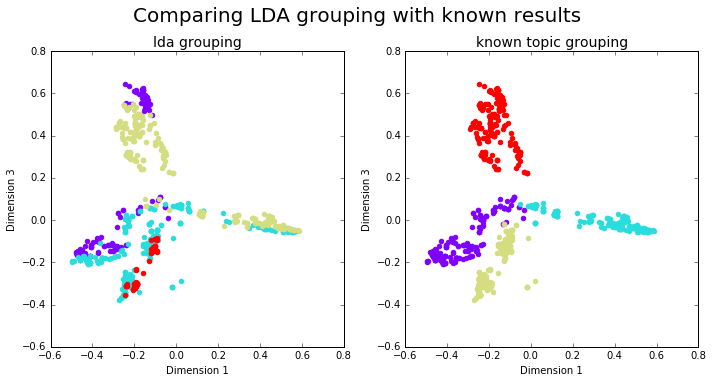

In [59]:
dim1=1;
dim2=3;
F=plt.figure(1,figsize=(10,5))
plt.subplot(121)
plot_lda(dim1,dim2)
plt.title('lda grouping',fontsize=14)
plt.xlabel('Dimension %s'%(dim1))
plt.ylabel('Dimension %s'%(dim2))
plt.subplot(122)
plot_topics(dim1,dim2)
plt.title('known topic grouping',fontsize=14)
plt.xlabel('Dimension %s'%(dim1))
plt.ylabel('Dimension %s'%(dim2))
F.suptitle('Comparing LDA grouping with known results', fontsize=20, y=1.05)
F.tight_layout()

In [60]:
prediction=np.argmax(lda.transform(tf),axis=1);
s=int(len(df)/n_components)
error=0;
for y in range(0,n_components):
    error=error+np.abs(pd.Series(prediction[s*y:s*(y+1)]).value_counts().values[0]-s)
print("Total number of missed true positives:",error)

Total number of missed true positives: 313


In [61]:
x=3 #index of the topic_title for confusion matrix
a=text_samples*x #setting start/stop locations of actual topic locations in KM
b=text_samples*(x+1)
LDA_group=df.loc[a:b,'topic'].value_counts().index[0]
print("""Most of topic %s (%s) are contained in LDA group %s.
Associating that topic with that LDA group and producing confusion matrix\n"""%(x, Topic_titles[x],LDA_group))
df_CM=pd.DataFrame(index=['Acutal topic (%s)'%(KM_group),'Actual others'],
                   columns=['Predicted topic (%s)'%(KM_group), 'Predicted others'])
df_CM.iloc[0,0]=(df.loc[a:b,'topic']==LDA_group).sum()-1
df_CM.iloc[0,1]=(df.loc[a:b,'topic']!=LDA_group).sum()-1
df_CM.iloc[1,0]=(df.loc[0:a,'topic']==LDA_group).sum()-1+(df.loc[b:,'topic']==LDA_group).sum()-1
df_CM.iloc[1,1]=(df.loc[0:a,'topic']!=LDA_group).sum()-1+(df.loc[b:,'topic']!=LDA_group).sum()-1
print(df_CM)
print('\nwith percents of:\ntrue positive at %s,\nfalse positve at %s,\nfalse negative at %s,\nand true negative at %s'%(
            np.round(df_CM.iloc[0,0]/text_samples*100,2),np.round(df_CM.iloc[0,1]/text_samples*100,2),
       np.round(df_CM.iloc[1,0]/(len(df)-text_samples)*100,2),np.round(df_CM.iloc[1,1]/(len(df)-text_samples)*100,2)))

Most of topic 3 (Secret_garden) are contained in LDA group 2.
Associating that topic with that LDA group and producing confusion matrix

                 Predicted topic (3) Predicted others
Acutal topic (3)                 143               55
Actual others                    115              482

with percents of:
true positive at 71.5,
false positve at 27.5,
false negative at 19.17,
and true negative at 80.33


# Multiple LDA

Just like with K-means, LDA is initialized in a random way and can fall into local minima. Repeating the process could give a better result, if there's some score metric to track.

In [62]:
n_trials=50;
predictions=np.zeros((n_trials,len(df)))
for x in range(0,n_trials):
    lda = LatentDirichletAllocation(n_topics=n_components,learning_method='batch')
    lda.fit(tf)
    predictions[x]=np.argmax(lda.transform(tf),axis=1)

In [63]:
scores=[];
for x in range(0,n_trials):
    error=0
    s=int(len(df)/n_components)
    for y in range(0,n_components):
        error=error+np.abs(pd.Series(predictions[x][s*y:s*(y+1)]).value_counts().values[0]-s)
    scores.append(error)
print(np.argmin(scores), np.min(scores))
print("Total number of missed true positives:",np.argmin(scores))

31 20
Total number of missed true positives: 31


In [64]:
df['topic']=predictions[np.argmin(scores)]

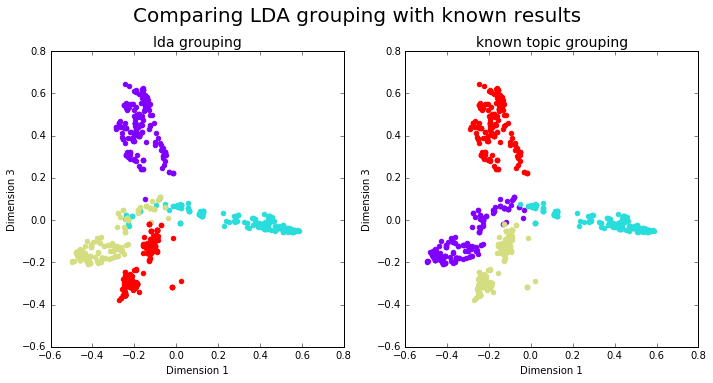

In [65]:
dim1=1;
dim2=3;
F=plt.figure(1,figsize=(10,5))
plt.subplot(121)
plot_lda(dim1,dim2)
plt.title('lda grouping',fontsize=14)
plt.xlabel('Dimension %s'%(dim1))
plt.ylabel('Dimension %s'%(dim2))
plt.subplot(122)
plot_topics(dim1,dim2)
plt.title('known topic grouping',fontsize=14)
plt.xlabel('Dimension %s'%(dim1))
plt.ylabel('Dimension %s'%(dim2))
F.suptitle('Comparing LDA grouping with known results', fontsize=20, y=1.05)
F.tight_layout()

In [66]:
print("Total number of missed true positives:",np.argmin(scores))

Total number of missed true positives: 31


## Another confusion matrix, if desired.

In [67]:
x=0 #index of the topic_title for confusion matrix
a=text_samples*x #setting start/stop locations of actual topic locations in KM
b=text_samples*(x+1)
LDA_group=df.loc[a:b,'topic'].value_counts().index[0]
print("""Most of topic %s (%s) are contained in LDA group %s.
Associating that topic with that LDA group and producing confusion matrix\n"""%(x, Topic_titles[x],LDA_group))
df_CM=pd.DataFrame(index=['Acutal topic (%s)'%(KM_group),'Actual others'],
                   columns=['Predicted topic (%s)'%(KM_group), 'Predicted others'])
df_CM.iloc[0,0]=(df.loc[a:b,'topic']==LDA_group).sum()-1
df_CM.iloc[0,1]=(df.loc[a:b,'topic']!=LDA_group).sum()-1
df_CM.iloc[1,0]=(df.loc[0:a,'topic']==LDA_group).sum()-1+(df.loc[b:,'topic']==LDA_group).sum()-1
df_CM.iloc[1,1]=(df.loc[0:a,'topic']!=LDA_group).sum()-1+(df.loc[b:,'topic']!=LDA_group).sum()-1
print(df_CM)
print('\nwith percents of:\ntrue positive at %s,\nfalse positve at %s,\nfalse negative at %s,\nand true negative at %s'%(
            np.round(df_CM.iloc[0,0]/text_samples*100,2),np.round(df_CM.iloc[0,1]/text_samples*100,2),
       np.round(df_CM.iloc[1,0]/(len(df)-text_samples)*100,2),np.round(df_CM.iloc[1,1]/(len(df)-text_samples)*100,2)))

Most of topic 0 (Christmas_Carol) are contained in LDA group 2.0.
Associating that topic with that LDA group and producing confusion matrix

                 Predicted topic (3) Predicted others
Acutal topic (3)                 179               20
Actual others                     -1              598

with percents of:
true positive at 89.5,
false positve at 10.0,
false negative at -0.17,
and true negative at 99.67


## Ordering plots to match known values:

I've dropped this section at the bottom because both K-means and LDA are based on a random initialization. So the number of a group will change even if the contents stay mostly the same. However, in this particular example we know the values in advance. So a few more lines of code can let me order the groups in LDA such that they are visually represented like the known data.

This has the added benefit of showing how powerful clustering can be, by showing a successful sorting of data in a projection where so clusters are apparent.

In [68]:
s=int(len(df)/n_components)
ordering={}
for x in range(0,n_components):
    top=int(df.loc[s*x:s*(x+1),'topic'].value_counts().index[0])
    ordering[x]=top

In [69]:
def plot_lda_ordered(dim1, dim2,ordering):
    colors=iter(cm.rainbow(np.linspace(0, 1, n_components)))
    for x in range(0,n_components):
        lda_topic=ordering[x]
        X=DenseMatrix[df.loc[df.loc[:,'topic']==lda_topic,:].index.values,dim1];
        Y=DenseMatrix[df.loc[df.loc[:,'topic']==lda_topic,:].index.values,dim2];
        c=next(colors)
        plt.scatter(X,Y,color=c)

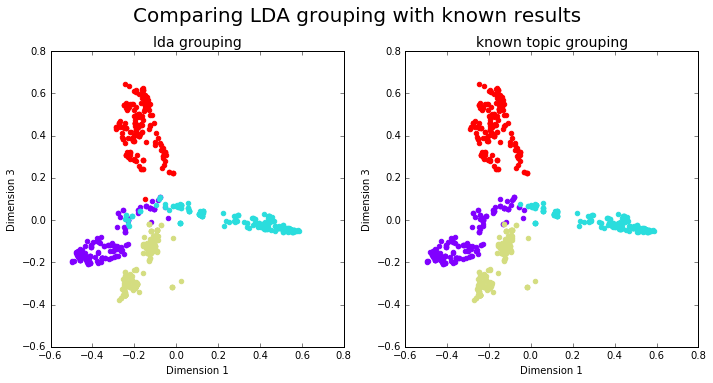

In [70]:
dim1=1;
dim2=3;
F=plt.figure(1,figsize=(10,5))
plt.subplot(121)
plot_lda_ordered(dim1,dim2,ordering)
plt.title('lda grouping',fontsize=14)
plt.xlabel('Dimension %s'%(dim1))
plt.ylabel('Dimension %s'%(dim2))
plt.subplot(122)
plot_topics(dim1,dim2)
plt.title('known topic grouping',fontsize=14)
plt.xlabel('Dimension %s'%(dim1))
plt.ylabel('Dimension %s'%(dim2))
F.suptitle('Comparing LDA grouping with known results', fontsize=20, y=1.05)
F.tight_layout()

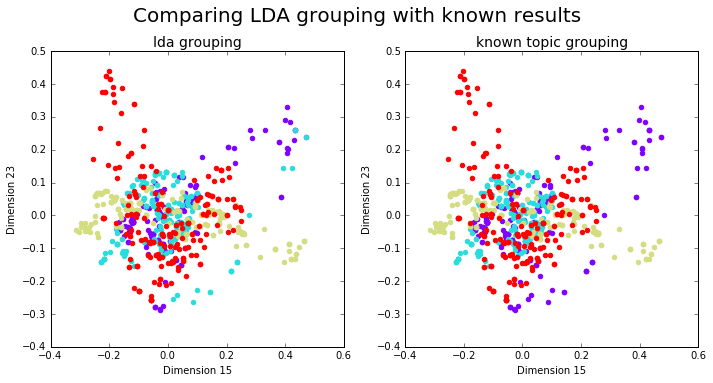

In [71]:
dim1=int(dim_top/3);
dim2=int(dim_top/2);
F=plt.figure(1,figsize=(10,5))
plt.subplot(121)
plot_lda_ordered(dim1,dim2,ordering)
plt.title('lda grouping',fontsize=14)
plt.xlabel('Dimension %s'%(dim1))
plt.ylabel('Dimension %s'%(dim2))
plt.subplot(122)
plot_topics(dim1,dim2)
plt.title('known topic grouping',fontsize=14)
plt.xlabel('Dimension %s'%(dim1))
plt.ylabel('Dimension %s'%(dim2))
F.suptitle('Comparing LDA grouping with known results', fontsize=20, y=1.05)
F.tight_layout()